In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import copy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
def bias_trick(X):
    one = np.ones((X.shape[0],1))
    X_concat = np.concatenate((one, X), axis=1)
    return X_concat

def sigmoid(z):
    '''
        Sigmoid function
    '''
    return 1/(1+np.exp(-z))
def cost_J(X, y, w):
    '''
        Measure how the difference between model's prediction and target (labels) values 
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Current weight
        Return: float,
            Value of cost function subject to weight.
    '''
    z = X.dot(w)
    hx = sigmoid(z) # prediction
    error = np.mean(-y*np.log(hx)-(1-y)*np.log(1-hx))
    return error

def gradient_J(X, y, w):
    '''
        Evaluate gradient of cost function subject to a weight.
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Weight
        Return: array-like,
            Gradient of cost function
    '''
    return (1/X.shape[0]) * X.T.dot((X.dot(w) - y))

class LogisticsRegression:
    '''
       An inheritance of Logistics Regression model
    '''
    def __init__(self, learning_rate = 0.001, max_iters = 100, batch_size=64, epochs=100, fit_intercept=True):
        '''
            @X: array-like,
                Input data.
            @Y: array-like,
                Input label.
            @w_init: array-like,
                An initial weight
            @learning_rate: float, default=0.001
                Hyperparameter for the solvers (optimization algorithms) to converge, chosen by range 0 to 1.
            @max_iters: int, default=100
                Maximum number of iterations taken for the solvers to converge.
            @batch_size: int, default=64
                Size of the mini batches. Regulary, used for mini-batch gradient descent.
            @epochs: int, default=100
                The number of an ENTIRE dataset is passed.
                
        '''
        self.lr = learning_rate
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.epochs = epochs
        self.hist = []
        self.weights = {}
        self.fit_intercept = fit_intercept

    def fit(self, X, y, alg='SGD'):
        self.X = copy.deepcopy(X)
        self.Y = copy.deepcopy(y.reshape(-1,1))
        if self.fit_intercept == True:
            self.X = bias_trick(self.X)
        # Initialize w
        self.w = np.random.randn(self.X.shape[1], 1)

        if alg == 'SGD':
            self.SGD()
        elif alg == 'BGD':
            self.BatchGD()
        elif alg == 'MiniBGD':
            self.MiniBatchGD()
    def BatchGD(self):
        '''
            Perform Linear Regression by Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        w_old = self.w
        ep = 1e-3
        for epoch in range(self.epochs):
            grad = gradient_J(self.X, self.Y, self.w)
            self.w = self.w - self.lr * grad
            loss = cost_J(self.X, self.Y, self.w)
            self.hist.append(loss)
            print(f'>> Epoch: {epoch}/{self.epochs}, Loss: {loss} =================== w: {self.w}')
            w_old = self.w
            self.weights[loss] = self.w
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        # return self.w
    
    def SGD(self):
        '''
            Perform Logistics Regression by Stochastic Gradient Descent
        '''
        N, p = self.X.shape
        rnd_inds = list(range(N))
        for epoch in range(self.epochs):
            np.random.shuffle(rnd_inds)
            for j,i in enumerate(rnd_inds):
                x = self.X[i,:].reshape(-1,1)
                y = self.Y[i]
                grad = gradient_J(x.T, y, self.w)
                self.w = self.w - self.lr * grad
                loss = cost_J(x.T, y, self.w)
                print(f'w at iter {j}: ', self.w, f',====================== Loss: {loss}')
                self.hist.append(loss)
                self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} ======================= Loss: {loss}')
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        # return self.w
    def MiniBatchGD(self):
        '''
            Perform Logistics Regression by Mini-Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        rnd_inds = list(range(N))
        for epoch in range(self.epochs):
            j = 0
            np.random.shuffle(rnd_inds)
            for iter in range(self.max_iters):
                if j > N:
                    break
                batch_inds = rnd_inds[j:j+self.batch_size]
                X = self.X[batch_inds,:]
                y = self.Y[batch_inds]
                grad = gradient_J(X,y,self.w)
                self.w = self.w - self.lr * grad             
                print(f'w at iter {iter}: ', self.w)
                j += self.batch_size
                loss = cost_J(X, y, self.w)
                self.hist.append(loss)
                self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} =========================== Loss: {loss}')
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        # return self.w
    def best_weights(self):
        '''
            Save the best weight of model
        '''
        # return min(self.weights.items(), key=lambda x: x[0])
        return (self.w, self.hist[-1])
    def history(self, ax):
        '''
            Plot a visualization for the loss function
        '''
        pass
        ax.plot(self.hist)
    def predict(self, X_test):
        if self.fit_intercept == True:
            X_test = bias_trick(X_test)
        pred = sigmoid(X_test @ self.w)
        return np.where(pred>0.5,1,0)

    def predict_proba(self, X_test):
        if self.fit_intercept == True:
            X_test = bias_trick(X_test)
        return sigmoid(X_test.dot(self.w))
    

In [ ]:
X = data.drop('target',axis=1)
y = data.target
X, y = X.to_numpy(), y.to_numpy()

In [ ]:
N, p = X.shape
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# w_init = np.random.randn(p+1, 1) # initialize w
model = LogisticsRegression(learning_rate=1e-5,epochs=10000)
model.fit(X_train, y_train, 'BGD')
pred_prob = model.predict_proba(X_test)
pred = model.predict(X_test)

Streaming output truncated to the last 5000 lines.
 [-0.02398355]
 [ 1.91451236]]
>> Epoch: 9643/10000, Loss: 0.9530085093013069 =================== w: [[-0.89985678]
 [-0.01436959]
 [-0.14735488]
 [-0.50516502]
 [ 0.00195379]
 [-0.00322828]
 [-0.89605266]
 [-0.50439566]
 [-0.00681467]
 [-1.14287404]
 [-0.25969594]
 [ 0.72714223]
 [-0.02398545]
 [ 1.91450529]]
>> Epoch: 9644/10000, Loss: 0.9530049618064511 =================== w: [[-0.8998569 ]
 [-0.01436971]
 [-0.14735621]
 [-0.50515791]
 [ 0.0019539 ]
 [-0.00322824]
 [-0.89605118]
 [-0.50439479]
 [-0.0068147 ]
 [-1.14287394]
 [-0.25969414]
 [ 0.72713967]
 [-0.02398736]
 [ 1.91449823]]
>> Epoch: 9645/10000, Loss: 0.9530014144271554 =================== w: [[-0.89985703]
 [-0.01436982]
 [-0.14735754]
 [-0.5051508 ]
 [ 0.00195401]
 [-0.00322821]
 [-0.8960497 ]
 [-0.50439392]
 [-0.00681472]
 [-1.14287384]
 [-0.25969234]
 [ 0.72713711]
 [-0.02398927]
 [ 1.91449116]]
>> Epoch: 9646/10000, Loss: 0.9529978671633625 =================== w: [[-0.

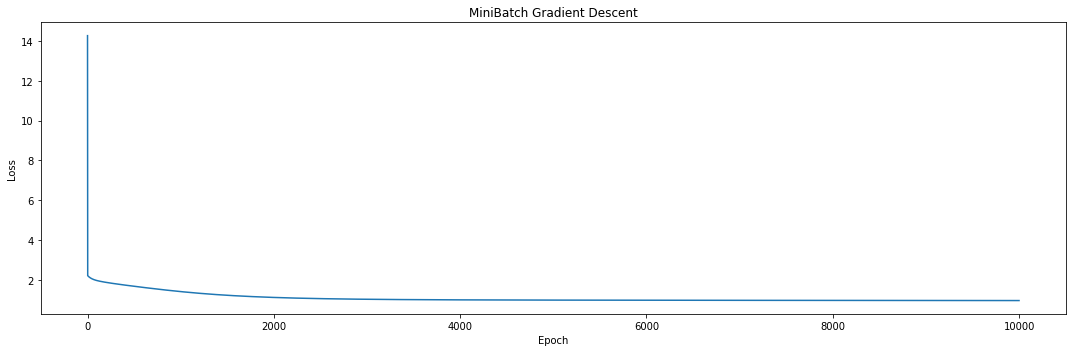

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
model.history(ax)
ax.set_title('MiniBatch Gradient Descent')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.tight_layout()
plt.show()

In [ ]:
# Sklearn Logistic Regression
skl_model = LogisticRegression()
skl_model.fit(X_train, y_train)
skl_pred = skl_model.predict(X_test)
skl_pred_proba = skl_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('MSE of my model: {}'.format(mean_squared_error(pred, y_test)))
print('MSE of sklearn model: {}'.format(mean_squared_error(skl_pred, y_test)))

MSE of my model: 0.5901639344262295
MSE of sklearn model: 0.11475409836065574
